In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import utils.helpers as helpers
import joblib
from prophet import Prophet
import pendulum

In [26]:
boroughs = [
            #'Bronx','Brooklyn', 'EWR', 
            'Manhattan'
            #, 'Queens', 'Staten Island'
]

In [27]:
pendulum.parse('2024-08-01')

DateTime(2024, 8, 1, 0, 0, 0, tzinfo=Timezone('UTC'))

In [28]:
test_dt = pendulum.parse('2024-08-01')
h1_dt = test_dt.subtract(hours = 1)
lead_dt = [test_dt]
for i in range(1,90):
    lead_dt.append(test_dt.subtract(days = i))

In [29]:
b = boroughs[0]
b

'Manhattan'

In [30]:
mae = []
mape = []
rmse = []
r2 = []
for i, dt in enumerate(lead_dt):
    print(f"Prophet w Regressor: {b}, Predict Aug 2024 by looking at historical data {i} days before")

    dt_start = dt.subtract(years=3)
    
    dt = dt.strftime('%Y-%m-%d %H:%M:%S')
    dt_start = dt_start.strftime('%Y-%m-%d %H:%M:%S')
    
    df = pd.read_parquet(f'../data/{b} - all txns.parquet.gz')
    df = df.reset_index()
    df['timestamp_hour'] = pd.to_datetime(df['timestamp_hour'])
    df = df.sort_values(by = 'timestamp_hour')
    df = df.rename(columns = {'num_txns_All': 'y', 'timestamp_hour': 'ds'})

    df = df[['ds', 'y', 
                   'rolling_avg_w1-w4_lags', 
                   #'is_long_weekend',
                   # 'is_rush_hour', 
                   #'is_business_hour', 
                   #'lag_168'
            ]]
    
    df_hist = df[(df['ds'] < str(dt)) & (df['ds']>=dt_start)]
    df_test = df[df['ds']>= '2024-08-01']
    
    df_hist = df_hist.dropna()

    best = joblib.load(f'../models/{b}_Prophet.joblib')
    
    model = Prophet(changepoint_prior_scale=best.changepoint_prior_scale,
                seasonality_prior_scale=best.seasonality_prior_scale,
                holidays_prior_scale=best.holidays_prior_scale,
                seasonality_mode=best.seasonality_mode,
                yearly_seasonality=best.yearly_seasonality,
                weekly_seasonality=best.weekly_seasonality,
                daily_seasonality=best.daily_seasonality)

    # Add exogenous variables as regressors
    model.add_regressor('rolling_avg_w1-w4_lags')

    # Add custom hourly seasonality (you can adjust the period if needed)
    model.add_seasonality(name='hourly', period=24, fourier_order = 8)

    # Fit the model
    model.fit(df_hist)

    future = pd.DataFrame({'ds': df_test['ds']})
    forecast = model.predict(df_test)
    results = helpers.performance_metrics(df_test['y'], forecast['yhat'])

    mae.append(results['mae'])
    mape.append(results['mape'])
    rmse.append(results['rmse'])
    r2.append(results['r2'])
    
    #model_loc = f'../models/{b}_Prophet_wRegressor.joblib'
    forecast_loc = f'../data/forecasts/{b}_Aug2024_forecasts_wRegressor_wLeadTime_windowed{dt}.csv'
    
    #joblib.dump(model, model_loc)
    forecast.to_csv(forecast_loc)

Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 0 days before


09:03:04 - cmdstanpy - INFO - Chain [1] start processing
09:03:24 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1584.61
MAPE: 7.74%
RMSE: 2469.67
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 1 days before


09:03:27 - cmdstanpy - INFO - Chain [1] start processing
09:03:54 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1584.04
MAPE: 7.61%
RMSE: 2467.78
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 2 days before


09:03:56 - cmdstanpy - INFO - Chain [1] start processing
09:04:20 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1581.11
MAPE: 7.51%
RMSE: 2464.35
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 3 days before


09:04:22 - cmdstanpy - INFO - Chain [1] start processing
09:04:47 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1576.37
MAPE: 7.43%
RMSE: 2458.64
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 4 days before


09:04:49 - cmdstanpy - INFO - Chain [1] start processing
09:05:13 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1582.53
MAPE: 7.36%
RMSE: 2464.66
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 5 days before


09:05:15 - cmdstanpy - INFO - Chain [1] start processing
09:05:43 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1578.30
MAPE: 7.32%
RMSE: 2460.36
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 6 days before


09:05:45 - cmdstanpy - INFO - Chain [1] start processing
09:06:05 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1588.84
MAPE: 7.26%
RMSE: 2471.17
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 7 days before


09:06:07 - cmdstanpy - INFO - Chain [1] start processing
09:06:31 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1597.04
MAPE: 7.22%
RMSE: 2478.15
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 8 days before


09:06:33 - cmdstanpy - INFO - Chain [1] start processing
09:06:53 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1611.99
MAPE: 7.20%
RMSE: 2489.93
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 9 days before


09:06:55 - cmdstanpy - INFO - Chain [1] start processing
09:07:12 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1639.49
MAPE: 7.25%
RMSE: 2513.09
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 10 days before


09:07:14 - cmdstanpy - INFO - Chain [1] start processing
09:07:37 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1672.20
MAPE: 7.35%
RMSE: 2537.99
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 11 days before


09:07:40 - cmdstanpy - INFO - Chain [1] start processing
09:08:07 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1749.25
MAPE: 7.68%
RMSE: 2595.17
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 12 days before


09:08:09 - cmdstanpy - INFO - Chain [1] start processing
09:08:27 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1870.10
MAPE: 8.27%
RMSE: 2687.04
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 13 days before


09:08:29 - cmdstanpy - INFO - Chain [1] start processing
09:08:49 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1847.12
MAPE: 8.16%
RMSE: 2668.30
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 14 days before


09:08:51 - cmdstanpy - INFO - Chain [1] start processing
09:09:13 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1834.54
MAPE: 8.09%
RMSE: 2659.52
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 15 days before


09:09:15 - cmdstanpy - INFO - Chain [1] start processing
09:09:46 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1717.46
MAPE: 7.54%
RMSE: 2571.54
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 16 days before


09:09:48 - cmdstanpy - INFO - Chain [1] start processing
09:10:13 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1674.22
MAPE: 7.35%
RMSE: 2541.92
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 17 days before


09:10:15 - cmdstanpy - INFO - Chain [1] start processing
09:10:41 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1632.46
MAPE: 7.23%
RMSE: 2508.89
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 18 days before


09:10:43 - cmdstanpy - INFO - Chain [1] start processing
09:11:10 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1622.23
MAPE: 7.21%
RMSE: 2502.45
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 19 days before


09:11:12 - cmdstanpy - INFO - Chain [1] start processing
09:11:36 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1595.49
MAPE: 7.19%
RMSE: 2481.34
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 20 days before


09:11:39 - cmdstanpy - INFO - Chain [1] start processing
09:12:09 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1599.16
MAPE: 7.19%
RMSE: 2486.29
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 21 days before


09:12:11 - cmdstanpy - INFO - Chain [1] start processing
09:12:43 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1584.39
MAPE: 7.23%
RMSE: 2475.04
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 22 days before


09:12:45 - cmdstanpy - INFO - Chain [1] start processing
09:13:11 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1579.74
MAPE: 7.45%
RMSE: 2476.25
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 23 days before


09:13:13 - cmdstanpy - INFO - Chain [1] start processing
09:13:38 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1593.67
MAPE: 7.53%
RMSE: 2493.64
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 24 days before


09:13:41 - cmdstanpy - INFO - Chain [1] start processing
09:13:51 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1597.82
MAPE: 7.80%
RMSE: 2500.36
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 25 days before


09:13:53 - cmdstanpy - INFO - Chain [1] start processing
09:14:24 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1599.48
MAPE: 7.51%
RMSE: 2499.87
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 26 days before


09:14:26 - cmdstanpy - INFO - Chain [1] start processing
09:14:48 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1630.06
MAPE: 7.21%
RMSE: 2521.54
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 27 days before


09:14:50 - cmdstanpy - INFO - Chain [1] start processing
09:15:04 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1728.70
MAPE: 7.49%
RMSE: 2597.34
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 28 days before


09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:28 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1976.32
MAPE: 8.71%
RMSE: 2784.53
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 29 days before


09:15:30 - cmdstanpy - INFO - Chain [1] start processing
09:15:51 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2117.00
MAPE: 9.58%
RMSE: 2892.02
R2: 0.91
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 30 days before


09:15:53 - cmdstanpy - INFO - Chain [1] start processing
09:16:07 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2228.07
MAPE: 10.30%
RMSE: 2977.20
R2: 0.91
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 31 days before


09:16:10 - cmdstanpy - INFO - Chain [1] start processing
09:16:32 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2294.41
MAPE: 10.73%
RMSE: 3029.46
R2: 0.91
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 32 days before


09:16:35 - cmdstanpy - INFO - Chain [1] start processing
09:16:52 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2293.34
MAPE: 10.72%
RMSE: 3029.60
R2: 0.91
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 33 days before


09:16:54 - cmdstanpy - INFO - Chain [1] start processing
09:17:10 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2163.25
MAPE: 9.88%
RMSE: 2927.97
R2: 0.91
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 34 days before


09:17:12 - cmdstanpy - INFO - Chain [1] start processing
09:17:32 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2067.78
MAPE: 9.26%
RMSE: 2853.80
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 35 days before


09:17:34 - cmdstanpy - INFO - Chain [1] start processing
09:17:51 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1973.58
MAPE: 8.69%
RMSE: 2780.45
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 36 days before


09:17:53 - cmdstanpy - INFO - Chain [1] start processing
09:18:08 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1803.12
MAPE: 7.78%
RMSE: 2651.12
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 37 days before


09:18:10 - cmdstanpy - INFO - Chain [1] start processing
09:18:34 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1653.07
MAPE: 7.17%
RMSE: 2538.53
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 38 days before


09:18:37 - cmdstanpy - INFO - Chain [1] start processing
09:19:02 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1619.97
MAPE: 7.12%
RMSE: 2512.72
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 39 days before


09:19:04 - cmdstanpy - INFO - Chain [1] start processing
09:19:28 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1600.72
MAPE: 7.17%
RMSE: 2498.29
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 40 days before


09:19:31 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1592.71
MAPE: 7.50%
RMSE: 2494.62
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 41 days before


09:19:51 - cmdstanpy - INFO - Chain [1] start processing
09:20:12 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1593.96
MAPE: 7.48%
RMSE: 2495.29
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 42 days before


09:20:14 - cmdstanpy - INFO - Chain [1] start processing
09:20:33 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1596.82
MAPE: 7.40%
RMSE: 2498.64
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 43 days before


09:20:36 - cmdstanpy - INFO - Chain [1] start processing
09:21:00 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1594.04
MAPE: 7.25%
RMSE: 2493.25
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 44 days before


09:21:02 - cmdstanpy - INFO - Chain [1] start processing
09:21:20 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1594.66
MAPE: 7.32%
RMSE: 2495.27
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 45 days before


09:21:22 - cmdstanpy - INFO - Chain [1] start processing
09:21:40 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1591.50
MAPE: 7.31%
RMSE: 2491.82
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 46 days before


09:21:42 - cmdstanpy - INFO - Chain [1] start processing
09:22:02 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1662.26
MAPE: 7.24%
RMSE: 2552.81
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 47 days before


09:22:04 - cmdstanpy - INFO - Chain [1] start processing
09:22:34 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1642.52
MAPE: 7.19%
RMSE: 2535.48
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 48 days before


09:22:36 - cmdstanpy - INFO - Chain [1] start processing
09:22:52 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1616.80
MAPE: 7.17%
RMSE: 2513.95
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 49 days before


09:22:54 - cmdstanpy - INFO - Chain [1] start processing
09:23:23 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1641.60
MAPE: 7.19%
RMSE: 2536.50
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 50 days before


09:23:26 - cmdstanpy - INFO - Chain [1] start processing
09:23:51 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1766.96
MAPE: 7.64%
RMSE: 2627.48
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 51 days before


09:23:55 - cmdstanpy - INFO - Chain [1] start processing
09:24:24 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1815.68
MAPE: 7.87%
RMSE: 2662.32
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 52 days before


09:24:26 - cmdstanpy - INFO - Chain [1] start processing
09:24:46 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1783.45
MAPE: 7.71%
RMSE: 2638.73
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 53 days before


09:24:48 - cmdstanpy - INFO - Chain [1] start processing
09:25:15 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1894.00
MAPE: 8.28%
RMSE: 2719.94
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 54 days before


09:25:17 - cmdstanpy - INFO - Chain [1] start processing
09:25:47 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2007.81
MAPE: 8.92%
RMSE: 2808.15
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 55 days before


09:25:49 - cmdstanpy - INFO - Chain [1] start processing
09:26:14 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1918.26
MAPE: 8.41%
RMSE: 2739.32
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 56 days before


09:26:16 - cmdstanpy - INFO - Chain [1] start processing
09:26:43 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1823.19
MAPE: 7.90%
RMSE: 2671.57
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 57 days before


09:26:45 - cmdstanpy - INFO - Chain [1] start processing
09:27:06 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1892.59
MAPE: 8.26%
RMSE: 2722.74
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 58 days before


09:27:08 - cmdstanpy - INFO - Chain [1] start processing
09:27:26 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1867.26
MAPE: 8.13%
RMSE: 2701.93
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 59 days before


09:27:28 - cmdstanpy - INFO - Chain [1] start processing
09:27:50 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1771.34
MAPE: 7.66%
RMSE: 2637.30
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 60 days before


09:27:52 - cmdstanpy - INFO - Chain [1] start processing
09:28:09 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1647.20
MAPE: 7.23%
RMSE: 2545.64
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 61 days before


09:28:12 - cmdstanpy - INFO - Chain [1] start processing
09:28:38 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1679.18
MAPE: 7.31%
RMSE: 2568.02
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 62 days before


09:28:41 - cmdstanpy - INFO - Chain [1] start processing
09:29:03 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1678.47
MAPE: 7.31%
RMSE: 2566.13
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 63 days before


09:29:05 - cmdstanpy - INFO - Chain [1] start processing
09:29:30 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1722.56
MAPE: 7.47%
RMSE: 2596.38
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 64 days before


09:29:32 - cmdstanpy - INFO - Chain [1] start processing
09:29:58 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1663.87
MAPE: 7.26%
RMSE: 2552.22
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 65 days before


09:30:00 - cmdstanpy - INFO - Chain [1] start processing
09:30:17 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1696.24
MAPE: 7.36%
RMSE: 2574.79
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 66 days before


09:30:19 - cmdstanpy - INFO - Chain [1] start processing
09:30:39 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1787.76
MAPE: 7.74%
RMSE: 2641.32
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 67 days before


09:30:41 - cmdstanpy - INFO - Chain [1] start processing
09:31:00 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1706.77
MAPE: 7.39%
RMSE: 2582.26
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 68 days before


09:31:02 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1922.29
MAPE: 8.46%
RMSE: 2736.45
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 69 days before


09:31:30 - cmdstanpy - INFO - Chain [1] start processing
09:31:54 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1970.76
MAPE: 8.73%
RMSE: 2773.38
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 70 days before


09:31:56 - cmdstanpy - INFO - Chain [1] start processing
09:32:27 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1987.02
MAPE: 8.83%
RMSE: 2785.06
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 71 days before


09:32:29 - cmdstanpy - INFO - Chain [1] start processing
09:32:50 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1976.67
MAPE: 8.77%
RMSE: 2776.71
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 72 days before


09:32:52 - cmdstanpy - INFO - Chain [1] start processing
09:33:15 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1732.03
MAPE: 7.48%
RMSE: 2594.65
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 73 days before


09:33:18 - cmdstanpy - INFO - Chain [1] start processing
09:33:49 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1690.98
MAPE: 7.31%
RMSE: 2565.14
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 74 days before


09:33:51 - cmdstanpy - INFO - Chain [1] start processing
09:34:09 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1718.01
MAPE: 7.42%
RMSE: 2585.22
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 75 days before


09:34:11 - cmdstanpy - INFO - Chain [1] start processing
09:34:41 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1617.25
MAPE: 7.13%
RMSE: 2510.53
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 76 days before


09:34:43 - cmdstanpy - INFO - Chain [1] start processing
09:35:03 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1689.07
MAPE: 7.30%
RMSE: 2567.32
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 77 days before


09:35:06 - cmdstanpy - INFO - Chain [1] start processing
09:35:22 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1620.60
MAPE: 7.14%
RMSE: 2515.99
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 78 days before


09:35:24 - cmdstanpy - INFO - Chain [1] start processing
09:35:41 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1596.51
MAPE: 7.31%
RMSE: 2497.92
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 79 days before


09:35:43 - cmdstanpy - INFO - Chain [1] start processing
09:36:03 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1608.49
MAPE: 7.69%
RMSE: 2516.25
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 80 days before


09:36:06 - cmdstanpy - INFO - Chain [1] start processing
09:36:22 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1624.23
MAPE: 7.93%
RMSE: 2533.94
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 81 days before


09:36:25 - cmdstanpy - INFO - Chain [1] start processing
09:36:43 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1614.46
MAPE: 7.76%
RMSE: 2524.35
R2: 0.94
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 82 days before


09:36:45 - cmdstanpy - INFO - Chain [1] start processing
09:37:11 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1666.80
MAPE: 8.49%
RMSE: 2571.86
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 83 days before


09:37:13 - cmdstanpy - INFO - Chain [1] start processing
09:37:41 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1716.48
MAPE: 8.98%
RMSE: 2617.57
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 84 days before


09:37:43 - cmdstanpy - INFO - Chain [1] start processing
09:38:03 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1637.92
MAPE: 8.12%
RMSE: 2548.46
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 85 days before


09:38:05 - cmdstanpy - INFO - Chain [1] start processing
09:38:34 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1907.11
MAPE: 10.64%
RMSE: 2769.33
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 86 days before


09:38:36 - cmdstanpy - INFO - Chain [1] start processing
09:39:07 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1946.91
MAPE: 10.92%
RMSE: 2806.49
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 87 days before


09:39:09 - cmdstanpy - INFO - Chain [1] start processing
09:39:30 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1721.45
MAPE: 9.01%
RMSE: 2623.91
R2: 0.93
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 88 days before


09:39:33 - cmdstanpy - INFO - Chain [1] start processing
09:39:59 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1954.46
MAPE: 10.96%
RMSE: 2815.51
R2: 0.92
Prophet w Regressor: Manhattan, Predict Aug 2024 by looking at historical data 89 days before


09:40:02 - cmdstanpy - INFO - Chain [1] start processing
09:40:31 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2184.09
MAPE: 12.66%
RMSE: 3005.49
R2: 0.91


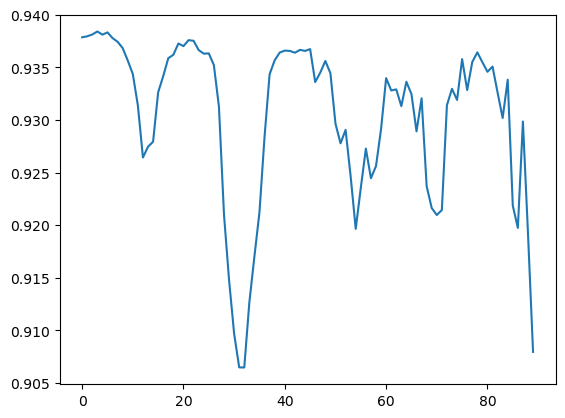

In [31]:
plt.plot(r2)

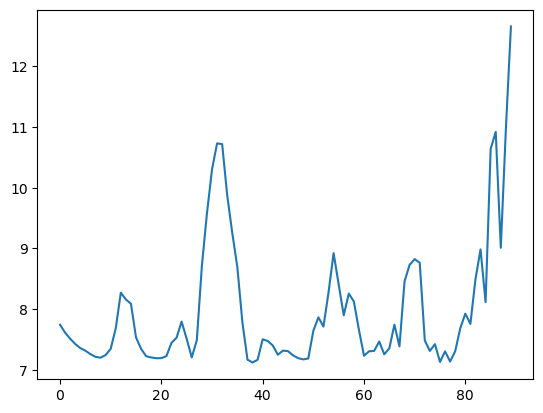

In [32]:
plt.plot(mape)